<a href="https://colab.research.google.com/github/AryanDhakal011/AI_Image_Generator/blob/main/AI_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
# Make sure you are on GPU Runtime
!pip install --upgrade diffusers transformers accelerate torch bitsandbytes scipy safetensors xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.3
    Uninstalling tokenizers-0.20.3:
      Successfully uninstalled tokenizers-0.20.3
  Attempting uninstall: accelerate
    Found 

##Image Generation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

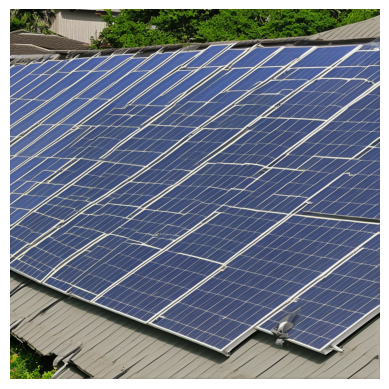

In [11]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

torch.cuda.empty_cache() #clears the gpu memory cache
model_id = "stabilityai/stable-diffusion-2-1" #pretrained stablediffusion model

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16) #Loads the pre-trained model pipeline for generating images from text.
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config) #Replaces the default scheduler in the pipeline with a DPMSolverMultistepScheduler(great for faster and high quality img generation results)
pipe = pipe.to("cuda") #moves the entire pipeline to the GPU for faster processing

prompt = "Solar pannel" #random prompt
image = pipe(prompt, width=1000, height=1000).images[0] #passes the prompt and extracts the first image [0] from the output

plt.imshow(image) # Displays generated image
plt.axis("off") # turn off axis numbers and ticks
plt.show() # shows the img on visualization window